In [96]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt 

X_train = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1)
y_train = [0, 0, 0, 0, 1, 1, 1, 1]

model = LogisticRegression()
model.fit(X_train, y_train)

model.predict([[5]])

array([1])

In [99]:
# class probabilities for each point
class_prob = model.predict_proba(X_train)

class_prob

array([[0.98360598, 0.01639402],
       [0.9490448 , 0.0509552 ],
       [0.85254586, 0.14745414],
       [0.64219651, 0.35780349],
       [0.35780843, 0.64219157],
       [0.14745684, 0.85254316],
       [0.05095624, 0.94904376],
       [0.01639437, 0.98360563]])

(0.0, 10.0)

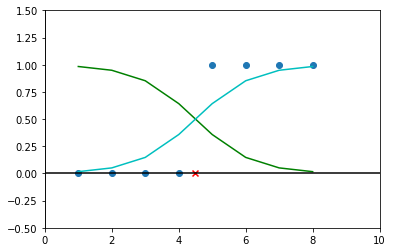

In [97]:
plt.scatter( X_train, y_train)

plt.plot(X_train, [ i[0] for i in class_prob], color='g')
plt.plot(X_train, [ i[1] for i in class_prob], color='c')

# plotting the decision boundary (a point)
# ax + b = 0 -> x = -b/a
plt.scatter(- model.intercept_/model.coef_, 0, marker='x', color='r')

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.ylim(-0.5, 1.5)
plt.xlim(0, 10)